In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AAPL.csv')

In [3]:
data.head()

,timestamp,open,high,low,close,adjusted_close,volume
0,6/3/2020,282.00,290.82,281.23,289.03,289.03,56544246
1,5/3/2020,295.52,299.55,291.41,292.92,292.92,46893219
2,4/3/2020,296.44,303.40,293.13,302.74,302.74,54794568
3,3/3/2020,303.67,304.00,285.80,289.32,289.32,79868852
4,2/3/2020,282.28,301.44,277.72,298.81,298.81,85349339


In [7]:
data.shape

(5033, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       5033 non-null   object 
 1   open            5033 non-null   float64
 2   high            5033 non-null   float64
 3   low             5033 non-null   float64
 4   close           5033 non-null   float64
 5   adjusted_close  5033 non-null   float64
 6   volume          5033 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.4+ KB


In [9]:
data.isna().sum()

timestamp         0
open              0
high              0
low               0
close             0
adjusted_close    0
volume            0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.nunique()

timestamp         5033
open              4447
high              4362
low               4410
close             4484
adjusted_close    4631
volume            5011
dtype: int64

In [13]:
data.describe()

,open,high,low,close,adjusted_close,volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,174.086855,175.947348,172.058818,174.049981,58.376220,2.369420e+07
std,161.042331,162.344631,159.497745,160.947151,67.393649,1.812657e+07
min,12.990000,13.190000,12.720000,13.120000,0.813400,7.025000e+05
25%,55.480000,56.940000,54.530000,55.650000,4.585100,1.008640e+07
50%,122.600000,124.750000,120.810000,122.420000,27.556300,2.034630e+07
75%,213.130000,214.500000,210.320000,212.460000,94.126800,3.204200e+07
max,702.410000,705.070000,699.570000,702.100000,327.200000,1.895606e+08


# EDA (Exploratory data analysis) 
## Data Visualization


In [14]:
# Definir columnas numéricas y categóricas
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('Tenemos {} columnas numéricas : {}'.format(len(numeric_features), numeric_features))
print('\nTenemos {} columnas categóricas : {}'.format(len(categorical_features), categorical_features))

Tenemos 6 columnas numéricas : ['open', 'high', 'low', 'close', 'adjusted_close', 'volume']

Tenemos 1 columnas categóricas : ['timestamp']


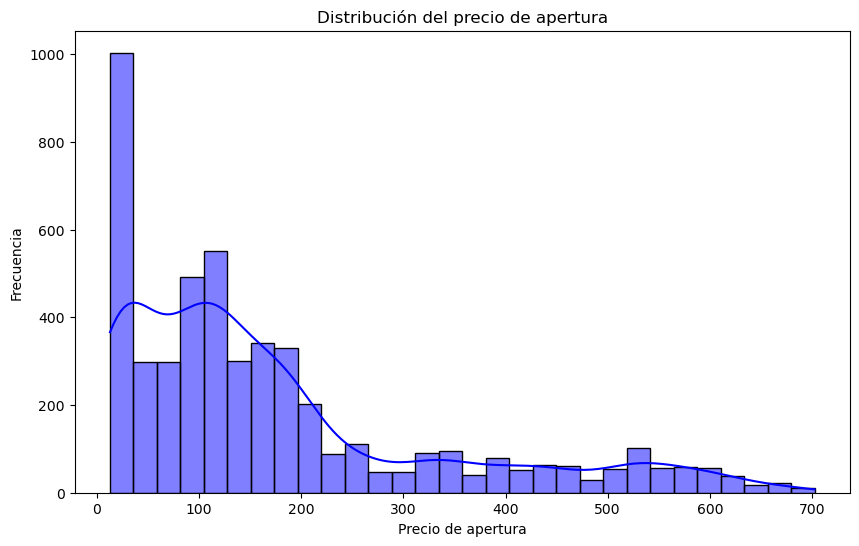

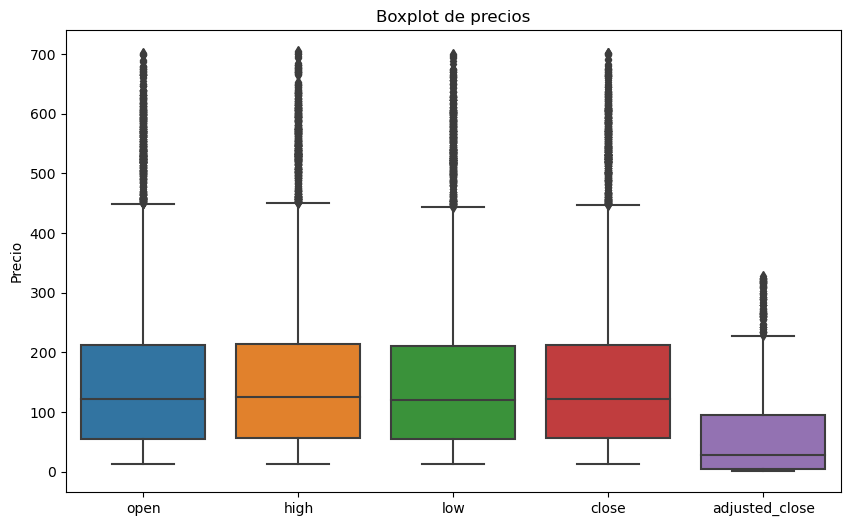

In [17]:
# Histogramas
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='open', bins=30, kde=True, color='blue')
plt.title('Distribución del precio de apertura')
plt.xlabel('Precio de apertura')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['open', 'high', 'low', 'close', 'adjusted_close']])
plt.title('Boxplot de precios')
plt.ylabel('Precio')
plt.show()

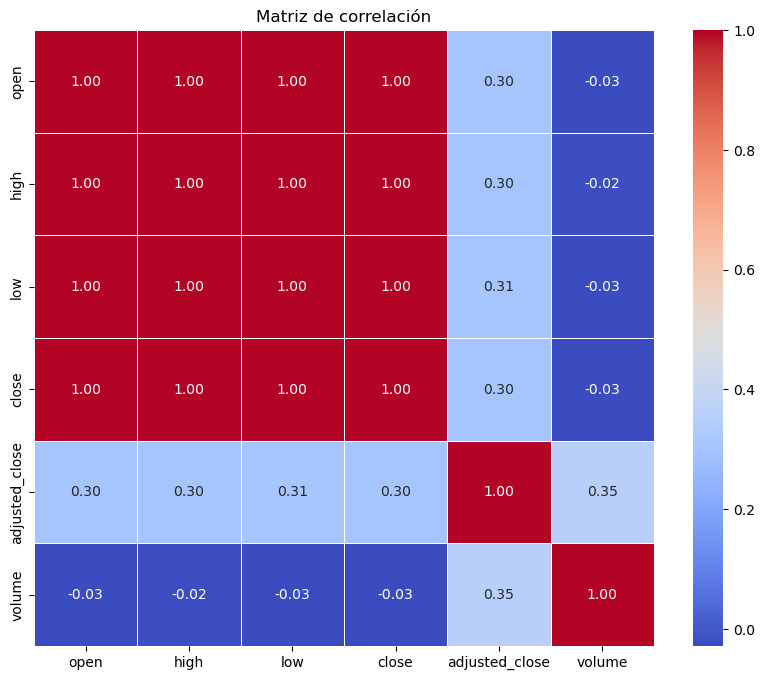

In [18]:
# Matriz de correlación
corr_matrix = data[['open', 'high', 'low', 'close', 'adjusted_close', 'volume']].corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [20]:
# Convertir la columna timestamp a fecha y hora
data['timestamp'] = pd.to_datetime(data['timestamp'])

C:\Users\Nacho\AppData\Local\Temp\ipykernel_18132\2465750271.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['timestamp'] = pd.to_datetime(data['timestamp'])


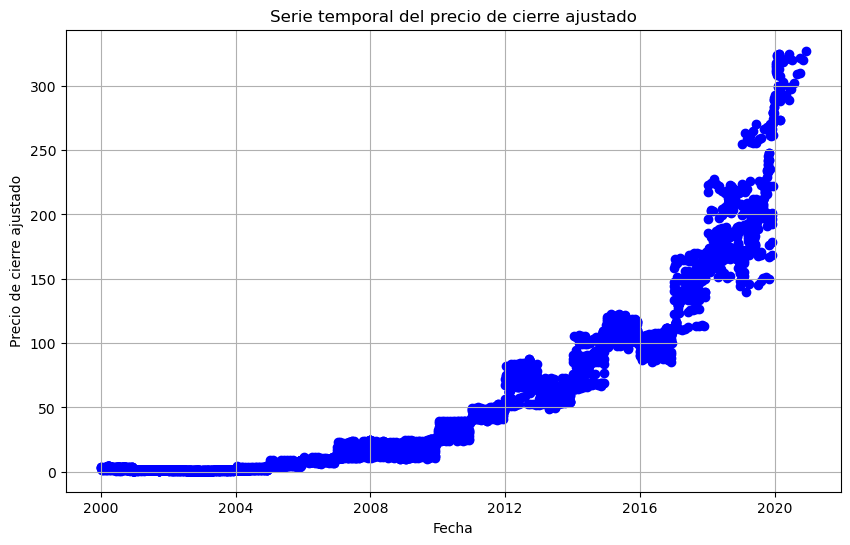

In [23]:
# Gráfico de la serie temporal del precio de cierre ajustado
plt.figure(figsize=(10, 6))
plt.scatter(data['timestamp'], data['adjusted_close'], color='blue')
plt.title('Serie temporal del precio de cierre ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.grid(True)
plt.show()

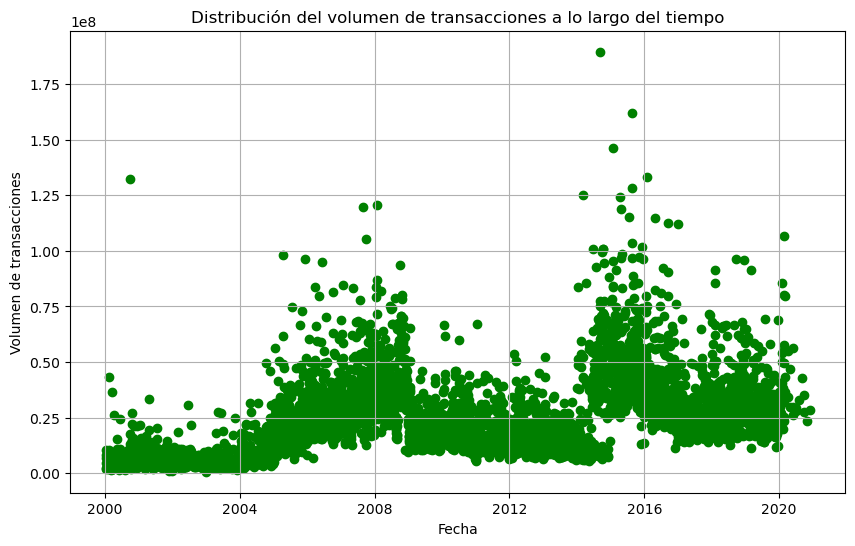

In [27]:
# Examinar la distribución del volumen de transacciones a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.scatter(data['timestamp'], data['volume'], color='green')
plt.title('Distribución del volumen de transacciones a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen de transacciones')
plt.grid(True)
plt.show()

# Modelo de Regresion Lineal
Vamos a predecir el precio de cierre de las acciones de Apple. 

1.0 Preparación de los datos

In [28]:
# Features (variables independientes)
X = data[['open', 'high', 'low', 'volume']]  # Puedes ajustar las características según sea necesario

# Target (variable objetivo)
y = data['close']  # Precio de cierre

1.1 División de los datos en conjuntos de entrenamiento y prueba:

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1.2 Construcción y entrenamiento del modelo de regresión lineal:

In [30]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

1.3 Evaluación del modelo:

In [31]:
# Calcular el coeficiente de determinación (R^2) en los datos de prueba
r2_score = model.score(X_test, y_test)
print("Coeficiente de determinación (R^2):", r2_score)


Coeficiente de determinación (R^2): 0.9999307609929403


1.4 Predicciones-

Finalmente, vamos a utilizar el modelo entrenado para hacer predicciones sobre nuevos datos.

In [32]:
# Hacer predicciones en los datos de prueba
predictions = model.predict(X_test)

1.5 Graficamos la Regresion

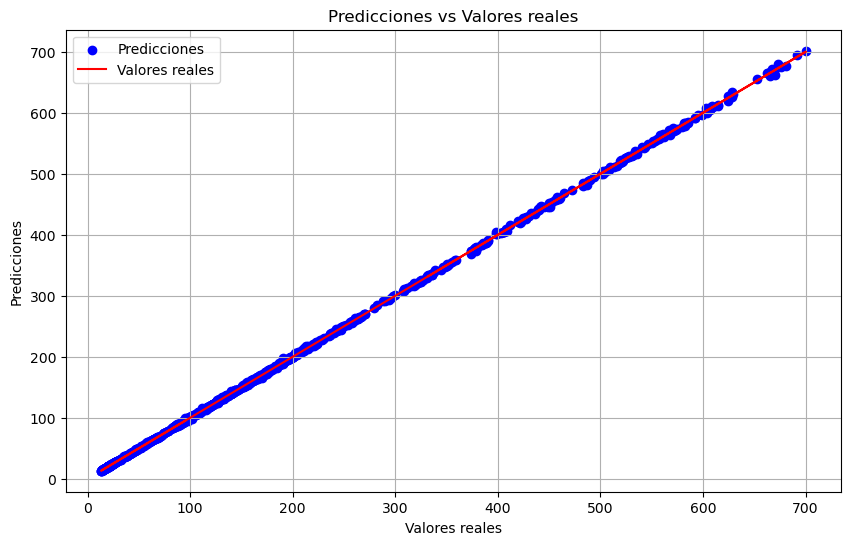

In [35]:

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicciones')
plt.plot(y_test, y_test, color='red', linestyle='-', label='Valores reales')
plt.title('Predicciones vs Valores reales')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Regressor

In [40]:
# Importar las biblioteca necesaria
from sklearn.ensemble import RandomForestRegressor

In [37]:
# Crear el modelo Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [38]:
# Hacer predicciones en los datos de prueba
rf_predictions = rf_model.predict(X_test)

In [39]:
# Calcular el coeficiente de determinación (R^2) en los datos de prueba
rf_r2_score = rf_model.score(X_test, y_test)
print("Coeficiente de determinación (R^2) del Random Forest Regressor:", rf_r2_score)

Coeficiente de determinación (R^2) del Random Forest Regressor: 0.9998570060210064
